In [1]:
import pandas as pd

df = pd.read_csv('personal_transactions.csv')
df

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,09/27/2019,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,09/28/2019,BP,33.46,debit,Gas & Fuel,Platinum Card
803,09/28/2019,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,09/30/2019,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [2]:
print(df.isnull().sum())

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64


In [5]:
df.describe()

,Amount
count,806.000000
mean,273.391489
std,667.630374
min,1.750000
25%,15.687500
50%,37.480000
75%,117.680000
max,9200.000000


# Exploratory Data Analysis 

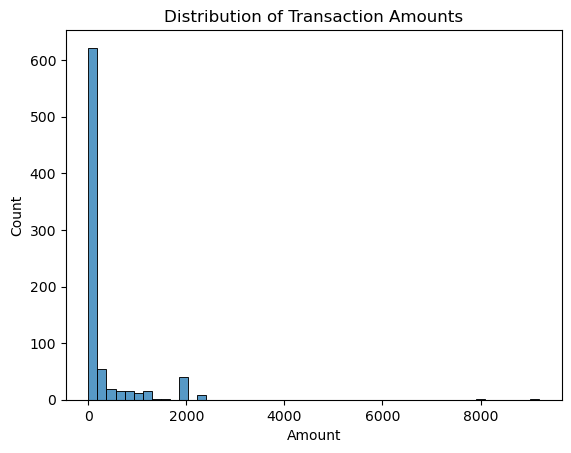

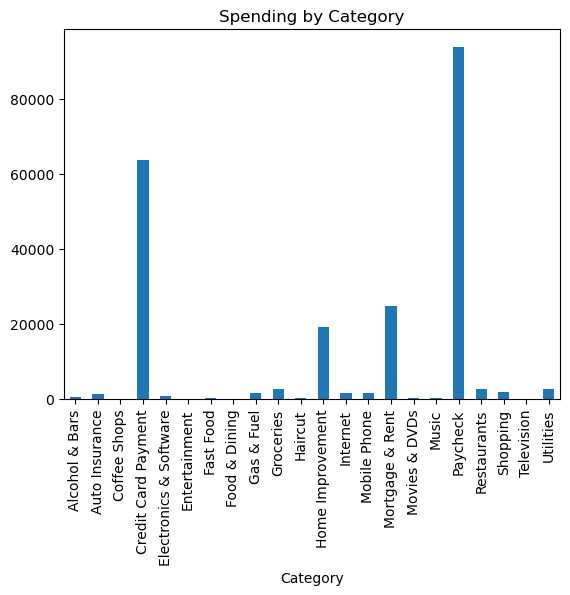

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()

df.groupby('Category')['Amount'].sum().plot(kind='bar')
plt.title('Spending by Category')
plt.show()

# Feature Engineering

In [6]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Feature from 'Description'
df['Description_length'] = df['Description'].apply(len)

df = pd.get_dummies(df, columns=['Transaction Type', 'Account Name'], drop_first=True)

# Building the Machine Learning Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['Amount', 'Description_length', 'Year', 'Month']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9008264462809917


# Visualizing Spending Patterns (Data Visualization)

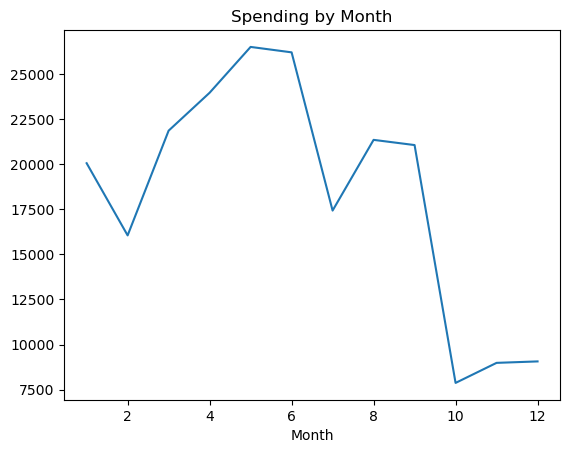

In [10]:
# Visualize spending by month
df.groupby('Month')['Amount'].sum().plot(kind='line')
plt.title('Spending by Month')
plt.show()

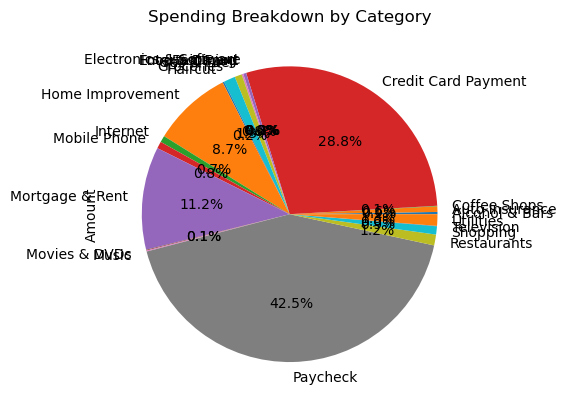

In [31]:
#Spending Breakdown by Category

df.groupby('Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Spending Breakdown by Category')
plt.show()

# Advanced Features (Optional)
Budget Alerts:

Implement a function to check if the total spending exceeds a set budget:

In [13]:
def check_budget(df, budget):
    total_spent = df['Amount'].sum()
    if total_spent > budget:
        print(f"Alert: You have exceeded your budget by {total_spent - budget}")
    else:
        print(f"Budget is on track. Total spent: {total_spent}")

In [15]:
import pandas as pd

df = pd.read_csv('personal_transactions.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [20]:
# Resample data by month and sum amounts
monthly_data = df.resample('M').sum(numeric_only=True)
print("Columns in monthly_data:", monthly_data.columns)


Columns in monthly_data: Index(['Amount'], dtype='object')


In [21]:
print("Missing values in monthly_data:")
print(monthly_data.isnull().sum())

Missing values in monthly_data:
Amount    0
dtype: int64


In [22]:
monthly_data = monthly_data.fillna(0)

monthly_data['Amount'] = pd.to_numeric(monthly_data['Amount'], errors='coerce')
data = monthly_data['Amount']
print(data.head())

Date
2018-01-31    10094.34
2018-02-28     8385.80
2018-03-31    10821.66
2018-04-30    13196.42
2018-05-31    16483.58
Freq: M, Name: Amount, dtype: float64


# Time-Series Forecasting with ARIMA

In [26]:
import pmdarima
print(pmdarima.__version__)

2.0.4


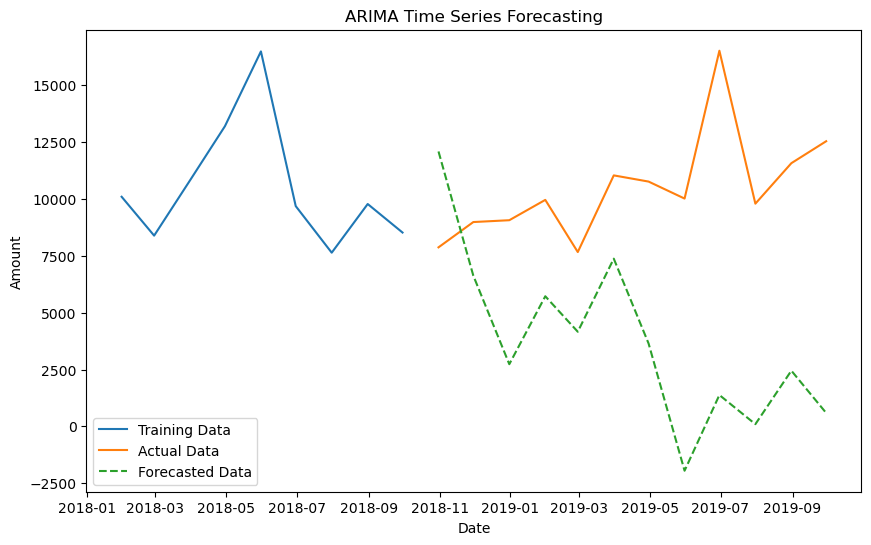

Mean Squared Error: 70812305.2179404


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df.dropna(subset=['Amount'], inplace=True)
monthly_data = df.resample('M').sum()

train = monthly_data[:-12]
test = monthly_data[-12:]

model = ARIMA(train['Amount'], order=(5,1,0))  # Adjust (p,d,q) parameters # Build and fit the ARIMA model
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)             # Forecast for the test period

plt.figure(figsize=(10,6))                         # Plot actual vs forecasted data
plt.plot(train.index, train['Amount'], label='Training Data')
plt.plot(test.index, test['Amount'], label='Actual Data')
plt.plot(test.index, forecast, label='Forecasted Data', linestyle='--')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

mse = mean_squared_error(test['Amount'], forecast)
print(f'Mean Squared Error: {mse}')

# Clustering (Unsupervised Learning)
Goal: Group similar transactions together based on features

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df['Transaction Type'] = df['Transaction Type'].astype('category').cat.codes       # Convert categorical variables to numerical codes
df['Category'] = df['Category'].astype('category').cat.codes
df['Account Name'] = df['Account Name'].astype('category').cat.codes

X = df[['Amount', 'Category', 'Transaction Type', 'Account Name']]                # Select the relevant columns for clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

         Date          Description   Amount Transaction Type  \
0  01/01/2018               Amazon    11.11            debit   
1  01/02/2018     Mortgage Payment  1247.44            debit   
2  01/02/2018      Thai Restaurant    24.22            debit   
3  01/03/2018  Credit Card Payment  2298.09           credit   
4  01/04/2018              Netflix    11.76            debit   

              Category   Account Name  
0             Shopping  Platinum Card  
1      Mortgage & Rent       Checking  
2          Restaurants    Silver Card  
3  Credit Card Payment  Platinum Card  
4        Movies & DVDs  Platinum Card  


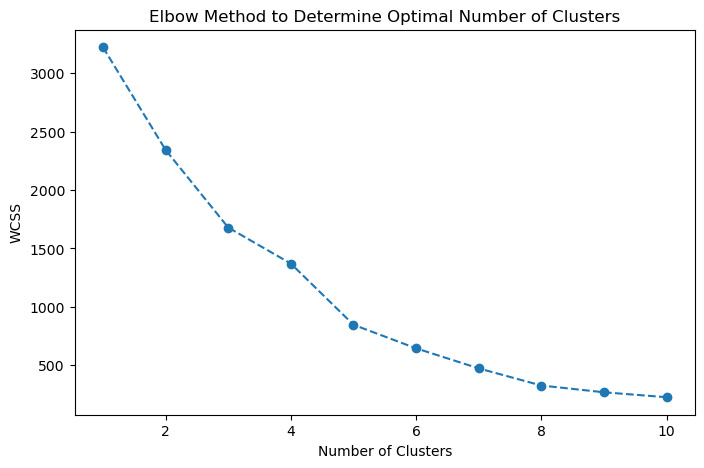

In [50]:
plt.figure(figsize=(8, 5))                     # Plotting the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

0    440
2    315
1     51
Name: Cluster, dtype: int64


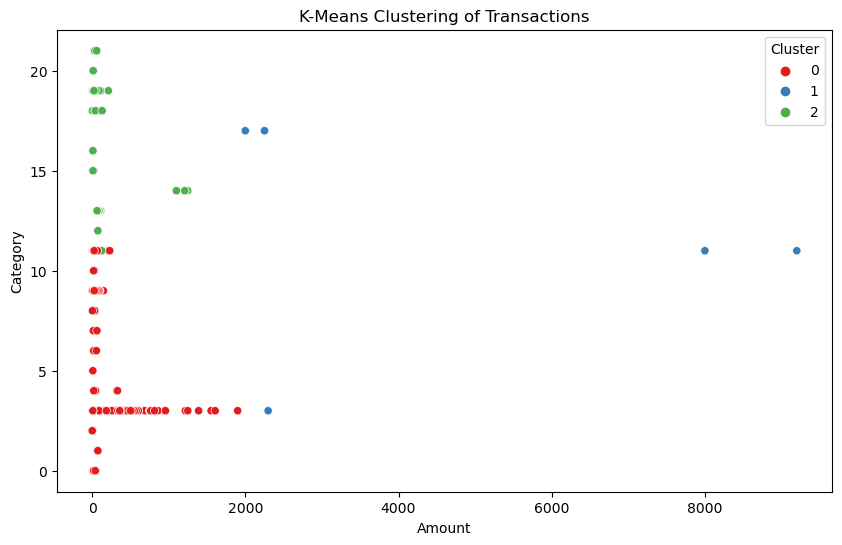

In [51]:
optimal_clusters = 3  

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df['Cluster'].value_counts())

# Visualize the clusters (Amount vs Category as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Amount'], y=df['Category'], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering of Transactions')
plt.show()

df.to_csv('clustered_transactions.csv', index=False)

# Anomaly Detection
Isolation Forest / LOF:  identify unusual or fraudulent transactions. They are effective for detecting outliers in transactional data.

In [53]:
from sklearn.ensemble import IsolationForest

features = df[['Amount']]  # Add more features if available

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(features)

# -1 indicates an anomaly
print(df[df['anomaly'] == -1])

           Date              Description   Amount Transaction Type  \
3    01/03/2018      Credit Card Payment  2298.09           credit   
172  05/11/2018  Mike's Construction Co.  8000.00            debit   
676  06/20/2019  Mike's Construction Co.  9200.00            debit   

                Category   Account Name  anomaly  
3    Credit Card Payment  Platinum Card       -1  
172     Home Improvement       Checking       -1  
676     Home Improvement       Checking       -1  


# Local Outlier Factor (LOF) 

In [54]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
df['anomaly'] = lof.fit_predict(features)
print(df[df['anomaly'] == -1])

           Date                Description   Amount Transaction Type  \
0    01/01/2018                     Amazon    11.11            debit   
3    01/03/2018        Credit Card Payment  2298.09           credit   
11   01/11/2018                      Shell    34.87            debit   
28   01/25/2018  Internet Service Provider    69.99            debit   
29   01/29/2018                      Shell    30.42            debit   
..          ...                        ...      ...              ...   
793  09/18/2019        Credit Card Payment  1606.46            debit   
796  09/20/2019        Credit Card Payment     9.43           credit   
798  09/23/2019        Credit Card Payment     9.43            debit   
801  09/27/2019          Biweekly Paycheck  2250.00           credit   
804  09/30/2019                  Starbucks     1.75            debit   

                Category   Account Name  anomaly  
0               Shopping  Platinum Card       -1  
3    Credit Card Payment  Platinu

# Sentiment Analysis on Descriptions

In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['Description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print(df[['Description', 'sentiment']])

                   Description  sentiment
0                       Amazon     0.1779
1             Mortgage Payment     0.0000
2              Thai Restaurant     0.0000
3          Credit Card Payment     0.3818
4                      Netflix     0.0000
..                         ...        ...
801          Biweekly Paycheck     0.0000
802                         BP     0.0000
803                     Sheetz     0.0000
804                  Starbucks     0.0000
805  Internet Service Provider     0.0000

[806 rows x 2 columns]
